<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Convnet example

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0


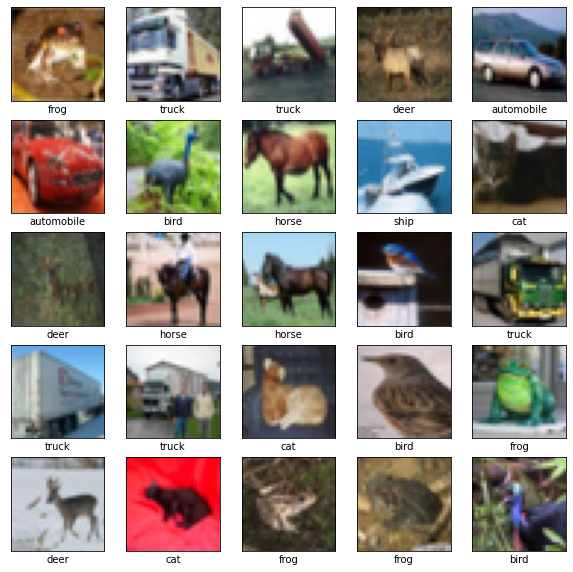

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 
          activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5060 - accuracy: 0.4536 - val_loss: 1.2428 - val_accuracy: 0.5499
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1421 - accuracy: 0.5954 - val_loss: 1.0452 - val_accuracy: 0.6320
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9901 - accuracy: 0.6528 - val_loss: 0.9744 - val_accuracy: 0.6571
Epoch 4/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9012 - accuracy: 0.6840 - val_loss: 0.9289 - val_accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8306 - accuracy: 0.7083 - val_loss: 0.9100 - val_accuracy: 0.6754
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7743 - accuracy: 0.7297 - val_loss: 0.9419 - val_accuracy: 0.6778
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7305 - accuracy: 0.7443 - val_loss: 0.8448 -

313/313 - 2s - loss: 0.8850 - accuracy: 0.7033


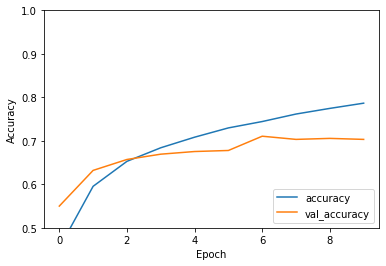

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)


0.7032999992370605
